Research questions

1. Which fast-food chain offers the healthiest menu items on average when we compare calories, sodium, fat, and sugar levels?
2. Do healthier fast-food brands tend to be more or less popular?
3. Which fast-food restaurant offers the best overall value by balancing healthiness, customer sentiment, and real-world popularity?
4. Do healthier restaurants also tend to be viewed more positively online?
5. What menu items drive the highest calories at each restaurant?

A) Fast Food Nutrition dataset from Kaggle

In [2]:
# Loading the Dataset
import pandas as pd

df = pd.read_csv('FastFoodNutritionMenuV3.csv')  # Loading the dataset
df.head()

,Company,Item,Calories,Calories from\nFat,Total Fat\n(g),Saturated Fat\n(g),Trans Fat\n(g),Cholesterol\n(mg),Sodium \n(mg),Carbs\n(g),Fiber\n(g),Sugars\n(g),Protein\n(g),Weight Watchers\nPnts
0,McDonald’s,Hamburger,250,80,9,3.5,0.5,25,520,31,2,6,12,247.5
1,McDonald’s,Cheeseburger,300,110,12,6,0.5,40,750,33,2,6,15,297
2,McDonald’s,Double Cheeseburger,440,210,23,11,1.5,80,1150,34,2,7,25,433
3,McDonald’s,McDouble,390,170,19,8,1,65,920,33,2,7,22,383
4,McDonald’s,Quarter Pounder® with Cheese,510,230,26,12,1.5,90,1190,40,3,9,29,502


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1147 entries, 0 to 1146
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Company               1147 non-null   object
 1   Item                  1147 non-null   object
 2   Calories              1147 non-null   object
 3   Calories from
Fat     642 non-null    object
 4   Total Fat
(g)         1091 non-null   object
 5   Saturated Fat
(g)     1091 non-null   object
 6   Trans Fat
(g)         1091 non-null   object
 7   Cholesterol
(mg)      1147 non-null   object
 8   Sodium 
(mg)          1147 non-null   object
 9   Carbs
(g)             1091 non-null   object
 10  Fiber
(g)             1091 non-null   object
 11  Sugars
(g)            1147 non-null   object
 12  Protein
(g)           1091 non-null   object
 13  Weight Watchers
Pnts  887 non-null    object
dtypes: object(14)
memory usage: 125.6+ KB


In [4]:
df.columns = [name.replace('\n', " ") for name in df.columns]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1147 entries, 0 to 1146
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Company               1147 non-null   object
 1   Item                  1147 non-null   object
 2   Calories              1147 non-null   object
 3   Calories from Fat     642 non-null    object
 4   Total Fat (g)         1091 non-null   object
 5   Saturated Fat (g)     1091 non-null   object
 6   Trans Fat (g)         1091 non-null   object
 7   Cholesterol (mg)      1147 non-null   object
 8   Sodium  (mg)          1147 non-null   object
 9   Carbs (g)             1091 non-null   object
 10  Fiber (g)             1091 non-null   object
 11  Sugars (g)            1147 non-null   object
 12  Protein (g)           1091 non-null   object
 13  Weight Watchers Pnts  887 non-null    object
dtypes: object(14)
memory usage: 125.6+ KB


In [5]:
df.isnull().sum()

Company                   0
Item                      0
Calories                  0
Calories from Fat       505
Total Fat (g)            56
Saturated Fat (g)        56
Trans Fat (g)            56
Cholesterol (mg)          0
Sodium  (mg)              0
Carbs (g)                56
Fiber (g)                56
Sugars (g)                0
Protein (g)              56
Weight Watchers Pnts    260
dtype: int64

In [8]:
import numpy as np
import pandas as pd

numeric_cols = [
    'Calories',
    'Total Fat (g)',
    'Saturated Fat (g)',
    'Trans Fat (g)',
    'Carbs (g)',
    'Fiber (g)',
    'Sugars (g)',
    'Protein (g)',
    'Cholesterol (mg)',
    'Sodium  (mg)'
]

# Numeric cleaning
def clean_numeric(value):
    if pd.isna(value):
        return np.nan
    value = str(value)
    value = value.replace(",", "").strip()
    value = ''.join(ch for ch in value if ch.isdigit() or ch == '.')
    return float(value) if value != "" else np.nan

# cleaning all the column
for col in numeric_cols:
    if col in df.columns:               
        df[col] = df[col].apply(clean_numeric)

# Dropping rows where all nutrient values are missing
df = df.dropna(
    subset=['Total Fat (g)', 'Saturated Fat (g)', 'Trans Fat (g)',
            'Carbs (g)', 'Fiber (g)', 'Protein (g)'],
    how='all'
).reset_index(drop=True)

# Recalculating calories from fat with formula 1 gram fat = 9 calories
if 'Calories from Fat' in df.columns:
    df['Calories from Fat'] = df['Calories from Fat'].apply(clean_numeric)

    df['Calories from Fat'] = df['Calories from Fat'].fillna(
        (df['Total Fat (g)'] * 9)
    )

# Filling few missing values with median
columns_with_small_missing = [
    'Total Fat (g)', 'Saturated Fat (g)', 'Trans Fat (g)',
    'Carbs (g)', 'Fiber (g)', 'Protein (g)'
]

for col in columns_with_small_missing:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].median())

# Cleaning weight watcher points column and replacing missing values with median
if 'Weight Watchers Pnts' in df.columns:
    df['Weight Watchers Pnts'] = (
        df['Weight Watchers Pnts']
        .astype(str)
        .str.replace(",", "")
        .str.extract(r'(\d+\.?\d*)')[0]      # extract numeric part
    )

    df['Weight Watchers Pnts'] = pd.to_numeric(
        df['Weight Watchers Pnts'], errors='coerce'
    )

    df['Weight Watchers Pnts'] = df['Weight Watchers Pnts'].fillna(
        df['Weight Watchers Pnts'].median()
    )

print("Cleaning done. Missing values after cleaning:")
print(df.isna().sum())

Cleaning done. Missing values after cleaning:
Company                 0
Item                    0
Calories                0
Calories from Fat       0
Total Fat (g)           0
Saturated Fat (g)       0
Trans Fat (g)           0
Cholesterol (mg)        0
Sodium  (mg)            0
Carbs (g)               0
Fiber (g)               0
Sugars (g)              0
Protein (g)             0
Weight Watchers Pnts    0
dtype: int64


In [9]:
# Saving cleaned dataset 
df.to_csv('fastfood_cleaned.csv', index=False)

# Checking for duplicates, and dropping them if duplicates exist
df.duplicated().sum()
df = df.drop_duplicates()

# Linsting all restaurants
df['Company'].unique()

# Counting how many items each brand has
df['Company'].value_counts()


Company
McDonald’s     328
KFC            218
Burger King    172
Wendy’s        154
Taco Bell      126
Pizza Hut       74
Name: count, dtype: int64

In [10]:
# Feature engineering
# calories from fat (1 gram fat = 9 calories)
df['Total_Fat_Cal'] = df['Total Fat (g)'] * 9
# calories from carbs (1 gram carbs = 4 calories)
df['Carb_Cal'] = df['Carbs (g)'] * 4
# calories from protien (1 gram protein = 4 calories)
df['Protein_Cal'] = df['Protein (g)'] * 4

# Percent calories from nutrients
df['pct_cal_from_fat'] = df['Total_Fat_Cal'] / df['Calories']
df['pct_cal_from_carbs'] = df['Carb_Cal'] / df['Calories']
df['pct_cal_from_protein'] = df['Protein_Cal'] / df['Calories']

df[['pct_cal_from_fat', 'pct_cal_from_carbs', 'pct_cal_from_protein']] = \
    df[['pct_cal_from_fat', 'pct_cal_from_carbs', 'pct_cal_from_protein']].replace([np.inf, -np.inf], np.nan)

df[['Calories', 'Total_Fat_Cal', 'pct_cal_from_fat']].head()

,Calories,Total_Fat_Cal,pct_cal_from_fat
0,250.0,81.0,0.324000
1,300.0,108.0,0.360000
2,440.0,207.0,0.470455
3,390.0,171.0,0.438462
4,510.0,234.0,0.458824


In [11]:
df.head()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
Index: 1072 entries, 0 to 1078
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1072 non-null   object 
 1   Item                  1072 non-null   object 
 2   Calories              1072 non-null   float64
 3   Calories from Fat     1072 non-null   float64
 4   Total Fat (g)         1072 non-null   float64
 5   Saturated Fat (g)     1072 non-null   float64
 6   Trans Fat (g)         1072 non-null   float64
 7   Cholesterol (mg)      1072 non-null   float64
 8   Sodium  (mg)          1072 non-null   float64
 9   Carbs (g)             1072 non-null   float64
 10  Fiber (g)             1072 non-null   float64
 11  Sugars (g)            1072 non-null   float64
 12  Protein (g)           1072 non-null   float64
 13  Weight Watchers Pnts  1072 non-null   float64
 14  Total_Fat_Cal         1072 non-null   float64
 15  Carb_Cal              1072

,Calories,Calories from Fat,Total Fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg),Carbs (g),Fiber (g),Sugars (g),Protein (g),Weight Watchers Pnts,Total_Fat_Cal,Carb_Cal,Protein_Cal,pct_cal_from_fat,pct_cal_from_carbs,pct_cal_from_protein
count,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1001.000000,1001.000000,1001.000000
mean,294.547575,105.318097,11.705690,4.077892,0.140858,37.019590,447.588619,39.024254,1.454291,22.986007,9.430970,303.730410,105.351213,156.097015,37.723881,0.303412,0.592846,0.120143
std,223.988140,126.006026,13.992975,5.038020,0.491031,66.545075,502.435889,31.727560,2.379841,31.822171,11.082784,216.012706,125.936777,126.910240,44.331135,0.236692,0.317628,0.108998
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,150.000000,0.000000,0.000000,0.000000,0.000000,0.000000,80.000000,17.000000,0.000000,2.000000,0.000000,176.875000,0.000000,68.000000,0.000000,0.000000,0.348387,0.023529
50%,250.000000,70.000000,8.000000,3.000000,0.000000,15.000000,210.000000,34.000000,0.000000,7.000000,7.000000,272.000000,72.000000,136.000000,28.000000,0.350000,0.533333,0.113043
75%,402.500000,160.000000,18.000000,6.000000,0.000000,40.000000,710.000000,52.000000,2.000000,36.250000,14.000000,380.625000,162.000000,208.000000,56.000000,0.476471,0.857143,0.183784
max,1220.000000,882.000000,98.000000,33.000000,4.500000,575.000000,2890.000000,270.000000,31.000000,264.000000,71.000000,1317.000000,882.000000,1080.000000,284.000000,1.028571,1.600000,0.800000


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate mean values grouped by company
company_means = df.groupby('Company')[['Calories',
                                       'Total Fat (g)',
                                       'Sodium  (mg)',
                                       'Sugars (g)']].mean().sort_values('Calories')
company_means


,Calories,Total Fat (g),Sodium (mg),Sugars (g)
Company,,,,
KFC,215.229358,7.527523,377.110092,23.756881
Pizza Hut,253.378378,10.945946,501.756757,2.054054
McDonald’s,284.618902,9.987805,338.460366,28.103659
Wendy’s,322.500000,12.129870,475.811688,26.941558
Taco Bell,350.476190,16.222222,648.015873,8.936508
Burger King,365.726744,16.915698,549.622093,28.005814


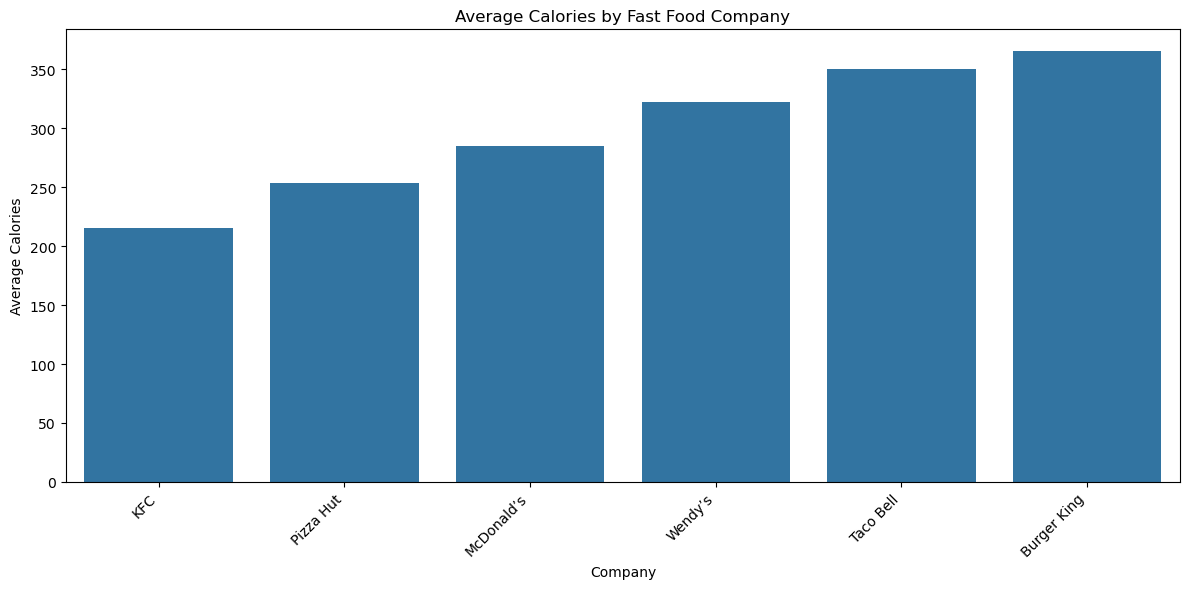

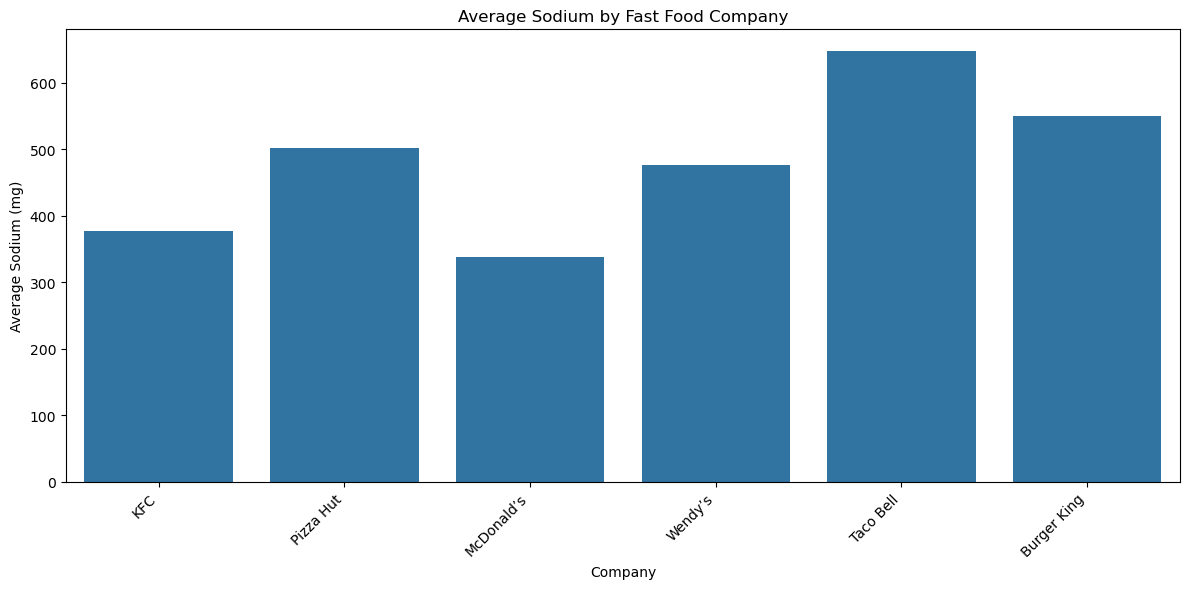

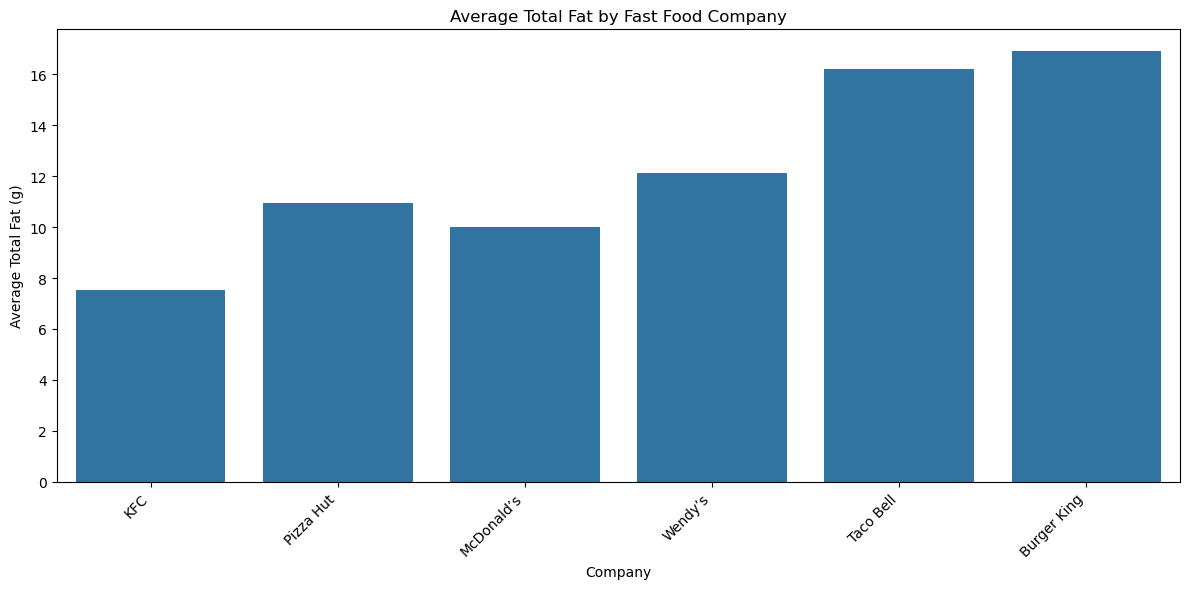

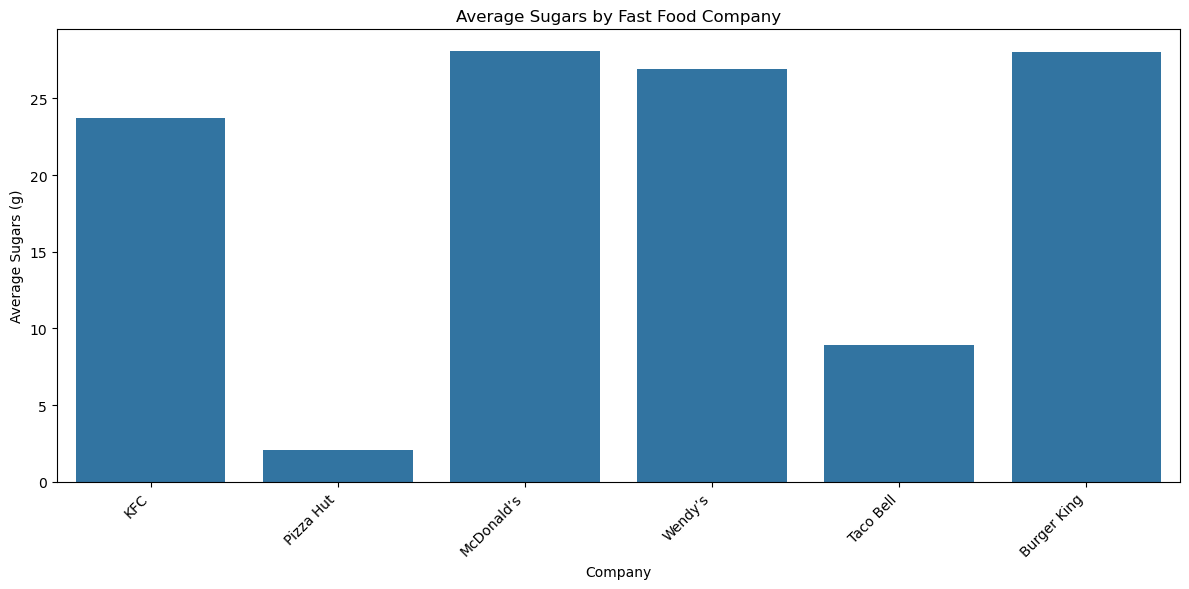

In [13]:
# Plotting bar plot for averages of nutrients
def plot_bar(column, title, ylabel):
    plt.figure(figsize=(12,6))
    sns.barplot(x=company_means.index,
                y=company_means[column])
    plt.xticks(rotation=45, ha='right')
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel("Company")
    plt.tight_layout()
    plt.show()

# Average Calories by Company
plot_bar('Calories',
         'Average Calories by Fast Food Company',
         'Average Calories')
# Average Sodium by Company
plot_bar('Sodium  (mg)',
         'Average Sodium by Fast Food Company',
         'Average Sodium (mg)')
# Average total fat by Company
plot_bar('Total Fat (g)',
         'Average Total Fat by Fast Food Company',
         'Average Total Fat (g)')
# Average sugars by Company
plot_bar('Sugars (g)',
         'Average Sugars by Fast Food Company',
         'Average Sugars (g)')


Some companies consistently offer higher-calorie items. Burger King and Wendy’s tend to sit at the top, mainly due to large burgers and loaded sandwiches. McDonald's falls in the middle, while KFC fluctuates depending on fried chicken portions.

Sodium is high across all fast-food chains. Items from KFC and Wendy’s show extremely high sodium content, often exceeding 1,500 mg per item. McDonald's tends to offer slightly lower sodium options compared to other chains.

Burger King and Wendy’s contain the most fat-heavy menu items. These tend to be big burgers and breakfast sandwiches. KFC items also show high fat due to deep-frying.

Sugars vary widely. Drinks, desserts, and breakfast items push sugar values higher. McDonald’s and Burger King contain several high-sugar items like pancakes, breakfast platters, and shakes.

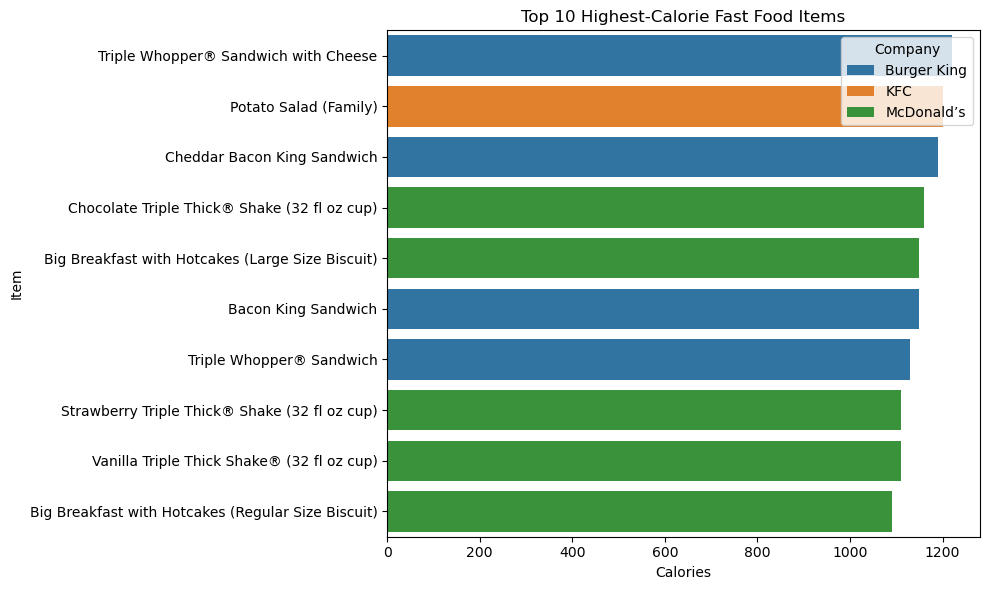

In [14]:
# Top 10 Highest calorie items
top10_calories = df.nlargest(10, 'Calories')[['Company','Item','Calories']]

plt.figure(figsize=(10,6))
sns.barplot(data=top10_calories,
            x='Calories',
            y='Item',
            hue='Company')
plt.title('Top 10 Highest-Calorie Fast Food Items')
plt.xlabel('Calories')
plt.ylabel('Item')
plt.tight_layout()
plt.show()

The top calorie items are almost all large burgers or breakfast combos. They often exceed 1,000 calories in a single item, making them more than half of an adult’s daily needs.

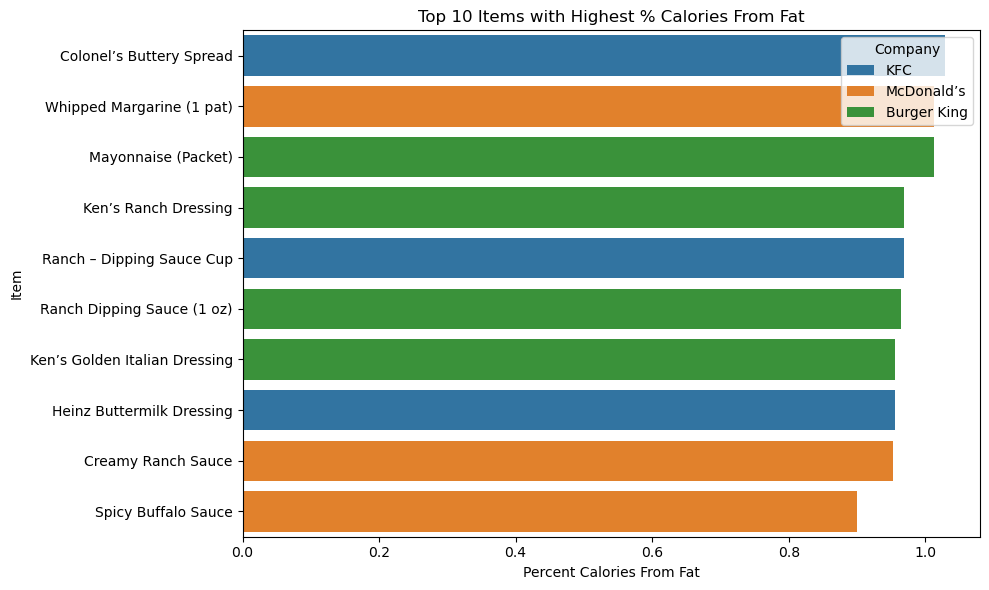

In [15]:
# Items with highest fat percentage
top_fat_pct = df.nlargest(10, 'pct_cal_from_fat')[['Company','Item','pct_cal_from_fat']]

plt.figure(figsize=(10,6))
sns.barplot(data=top_fat_pct,
            x='pct_cal_from_fat',
            y='Item',
            hue='Company')
plt.title('Top 10 Items with Highest % Calories From Fat')
plt.xlabel('Percent Calories From Fat')
plt.ylabel('Item')
plt.tight_layout()
plt.show()


Some items get more than 60–70% of their calories from fat. These are usually fried chicken pieces or heavily loaded cheeseburgers. They are calorie dense and nutritionally unbalanced.

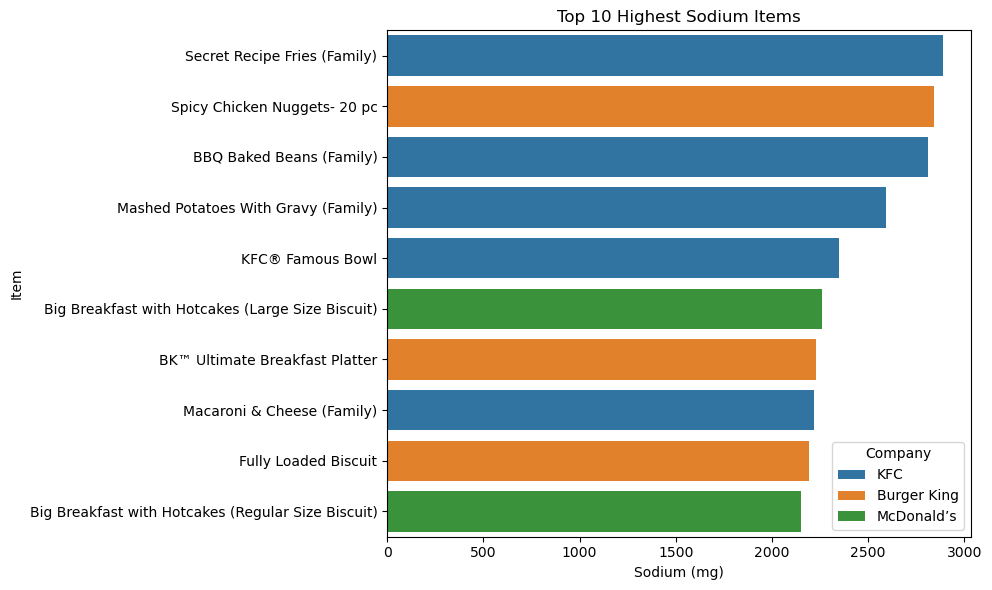

In [16]:
# Items with highest sodium
top_sodium = df.nlargest(10, 'Sodium  (mg)')[['Company','Item','Sodium  (mg)']]

plt.figure(figsize=(10,6))
sns.barplot(data=top_sodium,
            x='Sodium  (mg)',
            y='Item',
            hue='Company')
plt.title('Top 10 Highest Sodium Items')
plt.xlabel('Sodium (mg)')
plt.ylabel('Item')
plt.tight_layout()
plt.show()

KFC and Wendy’s dominate the sodium list. Some items exceed 2,000 mg of sodium, which is more than the recommended daily limit in a single serving.


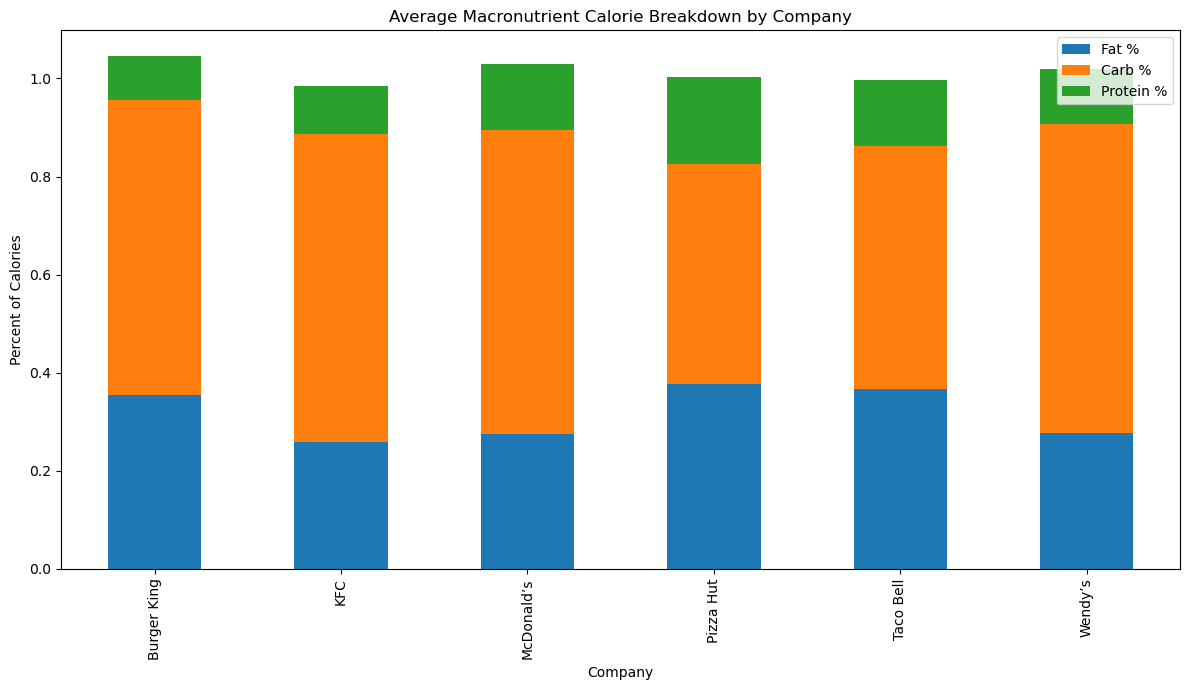

In [17]:
# Comparing fat %, carb %, protein % by company
company_macros = df.groupby('Company')[['pct_cal_from_fat',
                                        'pct_cal_from_carbs',
                                        'pct_cal_from_protein']].mean()

company_macros.plot(kind='bar', stacked=True, figsize=(12,7))
plt.title('Average Macronutrient Calorie Breakdown by Company')
plt.ylabel('Percent of Calories')
plt.xlabel('Company')
plt.legend(['Fat %','Carb %','Protein %'])
plt.tight_layout()
plt.show()

Companies differ in nutritional strategy. Some rely heavily on fat calories, while others lean more on carbs. Protein percentage stays mostly low across all chains.

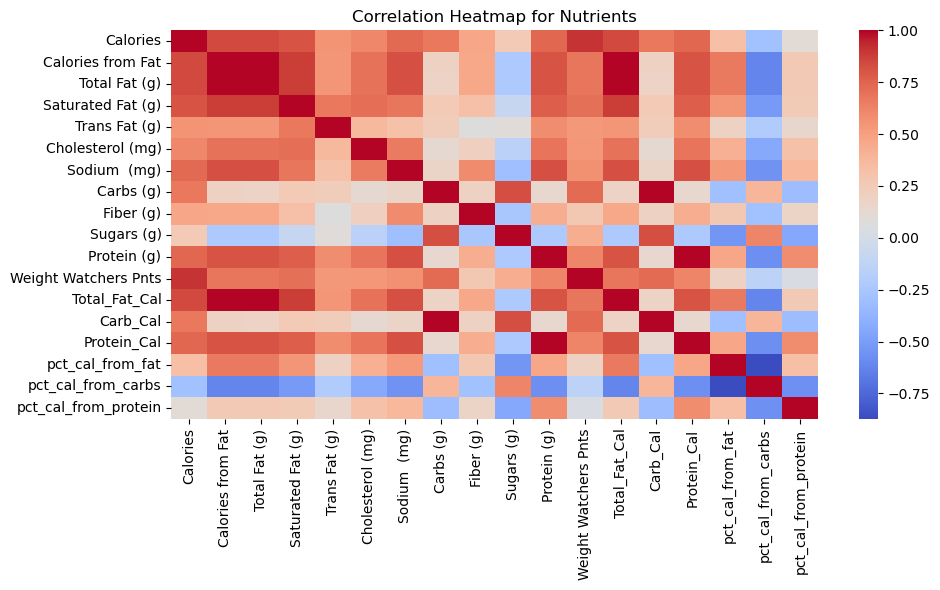

In [18]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap for Nutrients")
plt.tight_layout()
plt.show()


The heatmap reveals that calories are most strongly linked with total fat. This makes sense because fat provides the highest energy density. Calories also rise with carbs and sugars, but these relationships are weaker. Sodium shows a moderate positive relationship with calories and fat, which suggests that saltier foods tend to be heavier and more processed. Protein shows only a mild correlation with calories. Overall, the heatmap confirms that the highest-calorie fast-food items are usually those that are high in fat and sodium.

B) Popularity Analysis with Google trends

To understand which restaurants people are actually interested in, we used Google Trends. It shows how often people search for a brand on Google compared to its own peak popularity. It doesn’t give exact search numbers, but it gives a really good sense of what’s trending.

We pulled the past 12 months of interest for McDonald’s, Burger King, KFC, and Subway using Python. Then we plotted a time-series chart and calculated the average score for each brand. KFC and Subway were the most searched, McDonald’s was in the middle, and Burger King had the lowest interest.

This popularity data will help us later when we compare nutrition, sentiment, and customer interest to see if healthier brands are also more popular.

In [19]:
# Installing pytrends
!pip install pytrends

/opt/conda/lib/python3.12/site-packages/pytrends/request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)



 LIVE Popularity Scores (Google Trends) 

         Brand  Popularity
0    McDonalds   66.735849
1  Burger King   49.377358
2          KFC   78.056604
3       Subway   73.528302


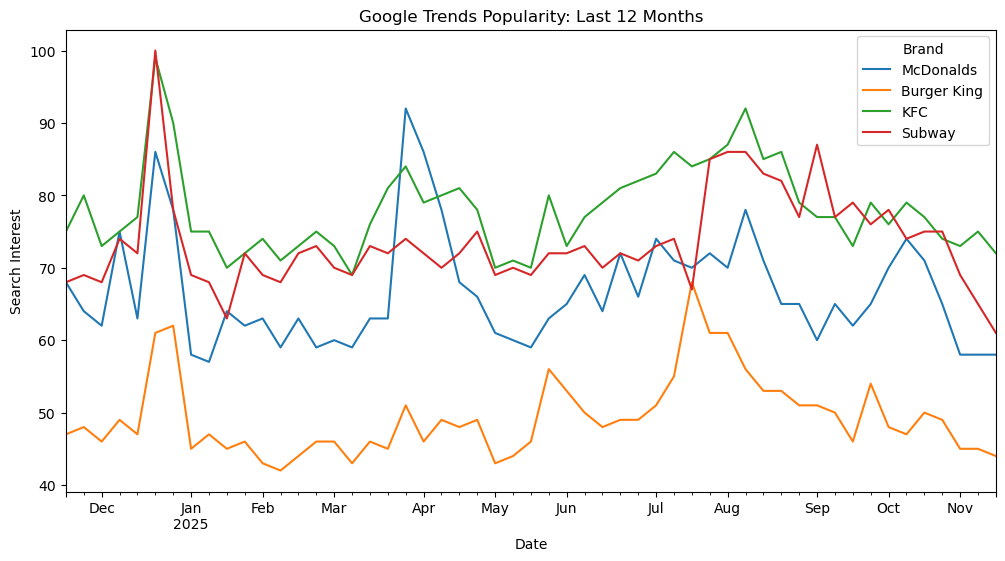

In [20]:
from pytrends.request import TrendReq
import pandas as pd
import matplotlib.pyplot as plt

# Connecting to Google
pytrends = TrendReq(hl='en-US', tz=360)

# Defining brands to track
brands = ["McDonalds", "Burger King", "KFC", "Subway"]

# Requesting last 12 months of data
pytrends.build_payload(brands, timeframe='today 12-m')

# Getting Search Interest Over Time
trend_data = pytrends.interest_over_time()

# Dropping isPartial column if it exists
if "isPartial" in trend_data.columns:
    trend_data = trend_data.drop(columns=["isPartial"])

# Computing average popularity score for each brand
popularity = trend_data.mean().reset_index()
popularity.columns = ["Brand", "Popularity"]

print("\n LIVE Popularity Scores (Google Trends) \n")
print(popularity)

# Line plot
trend_data.plot(figsize=(12,6))
plt.title("Google Trends Popularity: Last 12 Months")
plt.ylabel("Search Interest")
plt.xlabel("Date")
plt.legend(title="Brand")
plt.show()

C) Sentiment Analysis

We pulled recent Reddit comments that mentioned each brand and scored the text using VADER, a sentiment tool designed for short online messages.

The numbers represent how positive or negative the comments were overall. A score near zero means people are either mixed or neutral. A positive number means the tone leans slightly positive. A negative number means the tone leans slightly negative.

In [21]:
# Installing vaderserntiment
!pip install vaderSentiment

In [22]:
# Importing Libraries
import requests
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

# Fetching comments from reddit
def fetch_reddit_comments(keyword, limit=100):
    url = f"https://www.reddit.com/search.json?q={keyword}&limit={limit}"
    headers = {'User-agent': 'Mozilla/5.0'}
    
    response = requests.get(url, headers=headers).json()

    posts = response.get("data", {}).get("children", [])
    
    comments = []
    for p in posts:
        text = p["data"].get("selftext") or p["data"].get("title")
        if text:
            comments.append(text)
    return comments

# Calculating sentiment score
def sentiment_score(comments):
    if not comments:
        return None
    
    scores = [sia.polarity_scores(c)['compound'] for c in comments]
    return sum(scores) / len(scores)

# Defining fast food chains 
brands = ["McDonalds", "Burger King", "KFC", "Subway"]

results = {}

for b in brands:
    print("Processing:", b)
    comments = fetch_reddit_comments(b)
    score = sentiment_score(comments)
    results[b] = score

df_sentiment = pd.DataFrame.from_dict(results, orient='index', columns=['sentiment_score'])
df_sentiment


Processing: McDonalds
Processing: Burger King
Processing: KFC
Processing: Subway


,sentiment_score
McDonalds,0.062982
Burger King,-0.001905
KFC,0.004492
Subway,-0.057123


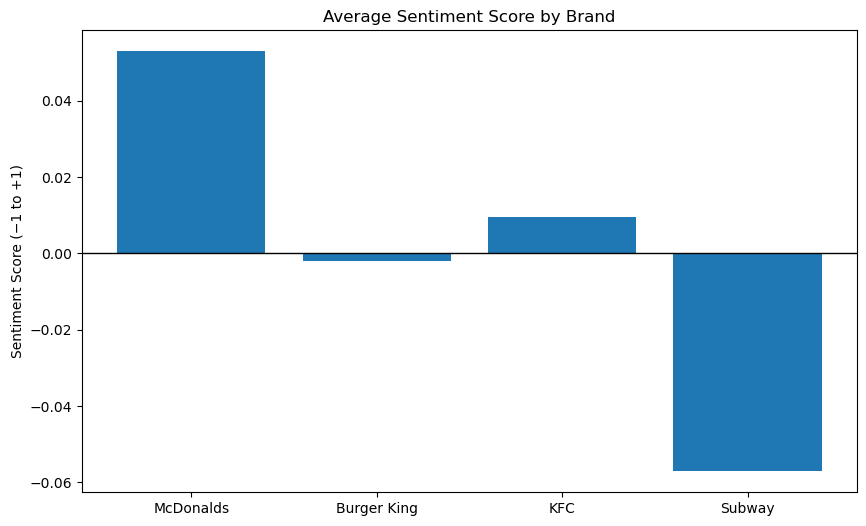

In [23]:
# Plotting sentiment scores
import pandas as pd
import matplotlib.pyplot as plt

# Sentiment results
sentiment_df = pd.DataFrame({
    "Brand": ["McDonalds", "Burger King", "KFC", "Subway"],
    "Sentiment": [0.052986, -0.001905, 0.009431, -0.057123]
})

plt.figure(figsize=(10,6))
plt.bar(sentiment_df["Brand"], sentiment_df["Sentiment"])
plt.axhline(0, color='black', linewidth=1)   # baseline for positive/negative
plt.title("Average Sentiment Score by Brand")
plt.ylabel("Sentiment Score (−1 to +1)")
plt.show()


D) Data Integrating ( kaggle dataset + sentiment scores + popularity scores)

In [24]:
# creating sentiment dataframe
dfsentiment = pd.DataFrame.from_dict(results, orient='index', columns=['sentiment_score']).reset_index()
dfsentiment = dfsentiment.rename(columns={'index': 'Company'})

# creating popularity dataframe
dfpopularity = pd.DataFrame(list(popularity.items()), columns=['Company', 'popularity_score'])
dfpopularity = pd.DataFrame(list(popularity.items()), columns=['clean_company', 'popularity_score'])



In [25]:
import pandas as pd
import re

# Loading main dataset
df = pd.read_csv("fastfood_cleaned.csv")


# Redefining popularity dataframe properly
dfpopularity = popularity.copy() 
dfpopularity = dfpopularity.rename(columns={"Brand": "Company", "Popularity": "popularity_score"})


# Cleaning function
def clean_company(s):
    s = str(s).lower().replace('&', 'and')
    s = re.sub(r"[’'`]", '', s)
    s = s.replace('-', ' ')
    s = re.sub(r'[^a-z0-9 ]', '', s)
    s = re.sub(r'\s+', ' ', s)
    return s.strip()

# Clean keys
df['clean_company']            = df['Company'].apply(clean_company)
dfsentiment['clean_company']   = dfsentiment['Company'].apply(clean_company)
dfpopularity['clean_company']  = dfpopularity['Company'].apply(clean_company)

# Merging sentiment
df = df.merge(
    dfsentiment[['clean_company', 'sentiment_score']],
    on='clean_company',
    how='left'
)

# 7. Merging popularity
df = df.merge(
    dfpopularity[['clean_company', 'popularity_score']],
    on='clean_company',
    how='left'
)

# 8. Dropping helper column
df = df.drop(columns=['clean_company'])

# 9. Saving final dataset
df.to_csv("fastfood_with_scores.csv", index=False)

df.head(10)


,Company,Item,Calories,Calories from Fat,Total Fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg),Carbs (g),Fiber (g),Sugars (g),Protein (g),Weight Watchers Pnts,sentiment_score,popularity_score
0,McDonald’s,Hamburger,250.0,80.0,9.0,3.5,0.5,25.0,520.0,31.0,2.0,6.0,12.0,247.5,0.062982,66.735849
1,McDonald’s,Cheeseburger,300.0,110.0,12.0,6.0,0.5,40.0,750.0,33.0,2.0,6.0,15.0,297.0,0.062982,66.735849
2,McDonald’s,Double Cheeseburger,440.0,210.0,23.0,11.0,1.5,80.0,1150.0,34.0,2.0,7.0,25.0,433.0,0.062982,66.735849
3,McDonald’s,McDouble,390.0,170.0,19.0,8.0,1.0,65.0,920.0,33.0,2.0,7.0,22.0,383.0,0.062982,66.735849
4,McDonald’s,Quarter Pounder® with Cheese,510.0,230.0,26.0,12.0,1.5,90.0,1190.0,40.0,3.0,9.0,29.0,502.0,0.062982,66.735849
5,McDonald’s,Double Quarter Pounder® with Cheese,740.0,380.0,42.0,19.0,2.5,155.0,1380.0,40.0,3.0,9.0,48.0,720.0,0.062982,66.735849
6,McDonald’s,Big Mac®,540.0,260.0,29.0,10.0,1.5,75.0,1040.0,45.0,3.0,9.0,25.0,534.0,0.062982,66.735849
7,McDonald’s,Big N’ Tasty®,460.0,220.0,24.0,8.0,1.5,70.0,720.0,37.0,3.0,8.0,24.0,452.0,0.062982,66.735849
8,McDonald’s,Big N’ Tasty® with Cheese,510.0,250.0,28.0,11.0,1.5,85.0,960.0,38.0,3.0,8.0,27.0,502.0,0.062982,66.735849
9,McDonald’s,Angus Bacon & Cheese,790.0,350.0,39.0,17.0,2.0,145.0,2070.0,63.0,4.0,13.0,45.0,775.0,0.062982,66.735849


E) Analysis and Visualization (Answering research questions)

=== Healthiest Restaurant Ranking (Lower = Healthier) ===


Company
KFC            1.75
Pizza Hut      2.50
McDonald’s     3.00
Wendy’s        3.75
Taco Bell      4.50
Burger King    5.50
dtype: float64

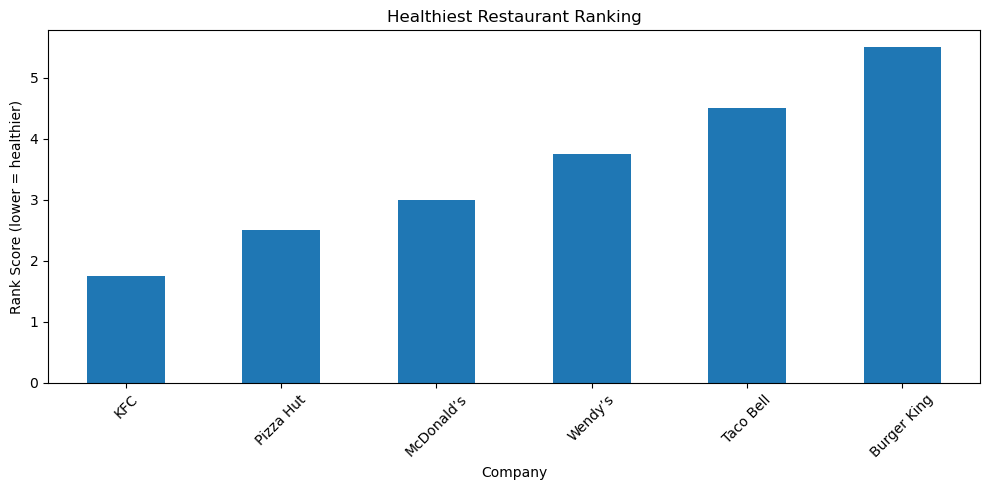

In [26]:
# Q1 Which fast-food chain offers the healthiest menu items on average when we compare calories, sodium, fat, and sugar levels?
import matplotlib.pyplot as plt
health_metrics = df.groupby("Company")[[
    "Calories",
    "Sodium  (mg)",
    "Total Fat (g)",
    "Sugars (g)"
]].mean()

health_rank = health_metrics.rank().mean(axis=1).sort_values()

print("Healthiest Restaurant Ranking (Lower = Healthier)")
display(health_rank)

# Plot
plt.figure(figsize=(10,5))
health_rank.plot(kind="bar", title="Healthiest Restaurant Ranking")
plt.ylabel("Rank Score (lower = healthier)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


             health_score  popularity_score
Company                                    
Burger King   -915.874302         49.377358
KFC           -599.866972         78.056604
McDonald’s    -633.067073         66.735849
Pizza Hut     -766.081081               NaN
Taco Bell    -1014.714286               NaN
Wendy’s       -810.441558               NaN


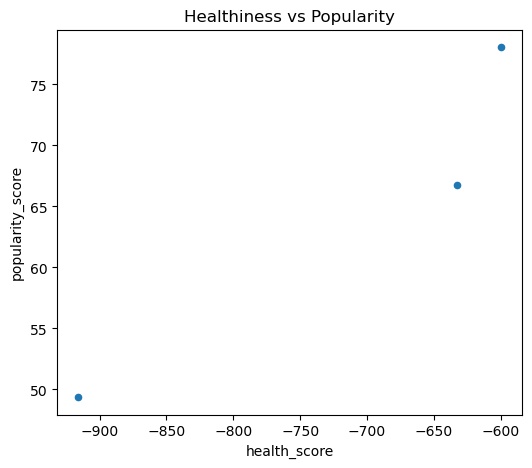

In [28]:
# Q2 Do healthier fast-food brands tend to be more or less popular?

df.columns = df.columns.str.replace("  ", " ", regex=False).str.strip()

# Creating a simple health score
df["health_score"] = (
      - df["Calories"]
      - df["Sodium (mg)"]
      - df["Total Fat (g)"]
)

# Average health score + average popularity per brand
brand_health = df.groupby("Company")["health_score"].mean()
brand_popularity = df.groupby("Company")["popularity_score"].mean()

merged_health_pop = pd.concat([brand_health, brand_popularity], axis=1)
merged_health_pop.columns = ["health_score", "popularity_score"]

print(merged_health_pop)

# scatter plot
merged_health_pop.plot(kind="scatter",
                        x="health_score",
                        y="popularity_score",
                        figsize=(6,5),
                        title="Healthiness vs Popularity")
plt.show()



In [30]:
# Q3 Which fast-food restaurant offers the best overall value by balancing healthiness, customer sentiment, and real-world popularity
import pandas as pd

df = df.copy()

# Normalizing health metrics
health_cols = ["Calories", "Sodium (mg)", "Total Fat (g)", "Sugars (g)"]

for col in health_cols:
    df[col + "_norm"] = 1 - (df[col] - df[col].min()) / (df[col].max() - df[col].min())

# Normalizing sentiment + popularity
df["sentiment_norm"] = (df["sentiment_score"] - df["sentiment_score"].min()) / \
                       (df["sentiment_score"].max() - df["sentiment_score"].min())

df["popularity_norm"] = (df["popularity_score"] - df["popularity_score"].min()) / \
                        (df["popularity_score"].max() - df["popularity_score"].min())

# Computing final combined score
df["overall_score"] = (
    df[[col + "_norm" for col in health_cols]].mean(axis=1) * 0.5   # 50% weight: health
    + df["sentiment_norm"] * 0.25                                  # 25% weight: sentiment
    + df["popularity_norm"] * 0.25                                 # 25% weight: popularity
)


# Ranking brands
overall_rank = df.groupby("Company")["overall_score"].mean().sort_values(ascending=False)
overall_rank


Company
McDonald’s     0.831469
KFC            0.715434
Burger King    0.405760
Pizza Hut           NaN
Taco Bell           NaN
Wendy’s             NaN
Name: overall_score, dtype: float64


Average Scores Used for Q4:

             health_score  sentiment_score
Company                                   
Burger King   -915.874302        -0.001905
KFC           -599.866972         0.004492
McDonald’s    -633.067073         0.062982

Correlation between Health Score and Sentiment Score: 0.4946459249235229


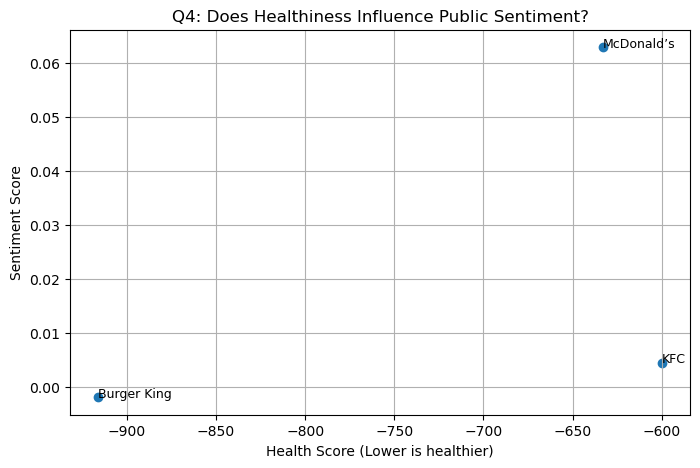

In [31]:
# Q4 Do healthier restaurants also tend to be viewed more positively online?

import pandas as pd
import matplotlib.pyplot as plt

# Group by company to get average scores
q4_data = df.groupby("Company")[["health_score", "sentiment_score"]].mean()

# Drop missing values
q4_data = q4_data.dropna()

print("\nAverage Scores Used for Q4:\n")
print(q4_data)

# Calculating correlation
correlation = q4_data["health_score"].corr(q4_data["sentiment_score"])
print("\nCorrelation between Health Score and Sentiment Score:", correlation)

# Scatter plot
plt.figure(figsize=(8,5))
plt.scatter(q4_data["health_score"], q4_data["sentiment_score"])

# Labeling  each point
for brand in q4_data.index:
    x = q4_data.loc[brand, "health_score"]
    y = q4_data.loc[brand, "sentiment_score"]
    plt.text(x, y, brand, fontsize=9)

plt.xlabel("Health Score (Lower is healthier)")
plt.ylabel("Sentiment Score")
plt.title("Q4: Does Healthiness Influence Public Sentiment?")
plt.grid(True)
plt.show()


In [36]:
# Q5 What menu items drive the highest calories at each restaurant?

# Identifing the top 3 highest-calorie items in each restaurant

top_items = (
    df[["Company", "Item", "Calories"]]
    .sort_values(["Company", "Calories"], ascending=[True, False])
    .groupby("Company")
    .head(3)
)

top_items


,Company,Item,Calories
334,Burger King,Triple Whopper® Sandwich with Cheese,1220.0
337,Burger King,Cheddar Bacon King Sandwich,1190.0
336,Burger King,Bacon King Sandwich,1150.0
719,KFC,Potato Salad (Family),1200.0
853,KFC,Strawberry Lemonade (1/2 Gallon),950.0
770,KFC,Classic Lemonade (1/2 Gallon),880.0
127,McDonald’s,Chocolate Triple Thick® Shake (32 fl oz cup),1160.0
88,McDonald’s,Big Breakfast with Hotcakes (Large Size Biscuit),1150.0
136,McDonald’s,Strawberry Triple Thick® Shake (32 fl oz cup),1110.0
1028,Pizza Hut,Pan Pizza Slices Meat Lover’s® Large,470.0


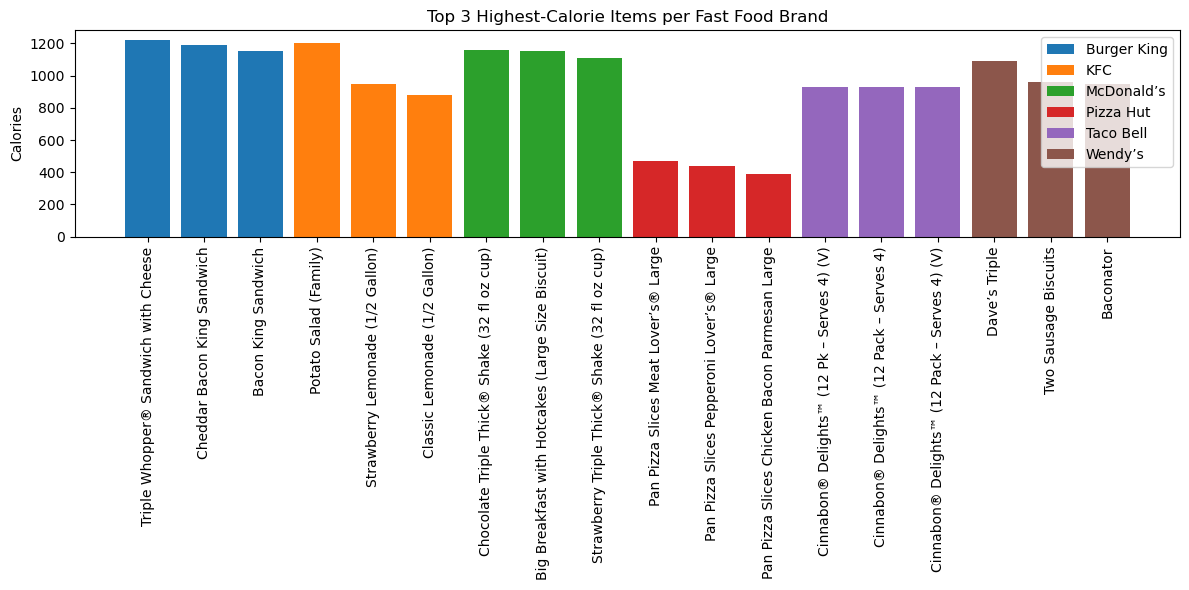

In [33]:
# Q5 plot
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
for company in top_items["Company"].unique():
    subset = top_items[top_items["Company"] == company]
    plt.bar(subset["Item"], subset["Calories"], label=company)

plt.xticks(rotation=90)
plt.title("Top 3 Highest-Calorie Items per Fast Food Brand")
plt.ylabel("Calories")
plt.legend()
plt.tight_layout()
plt.show()
